<a href="https://colab.research.google.com/github/Nyandwi/tf_vision/blob/main/Rock_Paper_and_Scissor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi Classifier - Rock Paper and Scissor

This is the implementation of multi classifier on `Rock` `Paper` `Scissors` dataset using Convolutional Neural Netwok(CNN).

The dataset made of 2892 images of hands of different races, agess, and genders was designed by [Laurence Moroney](http://www.laurencemoroney.com/rock-paper-scissors-dataset/), Developer Advocate at Google and Author of AI and Machine Learning for Coders.


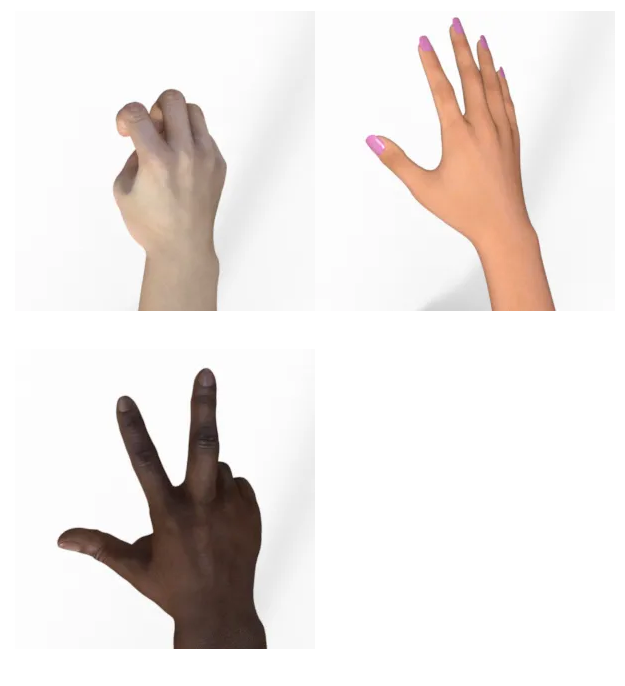 

## Loading the dataset

In [ ]:
## Importing all required libraries

import os
import zipfile 
import tensorflow as tf
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg


import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [ ]:
## Loading the dataset from dataset owner 

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
    -O /tmp/rps.zip
  
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
    -O /tmp/rps-test-set.zip

--2021-04-29 11:42:49--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.7.144, 172.217.12.240, 172.217.164.144, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.7.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 191.38M   141MB/s    in 1.4s    

2021-04-29 11:42:50 (141 MB/s) - ‘/tmp/rps.zip’ saved [200682221/200682221]

--2021-04-29 11:42:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.144, 172.217.7.240, 142.250.81.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.144|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘/tmp

In [ ]:
## Unzipping the dataset

local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

local_zip = '/tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('/tmp/rps/rock')
paper_dir = os.path.join('/tmp/rps/paper')
scissors_dir = os.path.join('/tmp/rps/scissors')

print('Number of training rock images:', len(os.listdir(rock_dir)))
print('Number of training paper images:', len(os.listdir(paper_dir)))
print('Number of training scissors images:', len(os.listdir(scissors_dir)))

rock_files = os.listdir(rock_dir)
print(rock_files[:10])

paper_files = os.listdir(paper_dir)
print(paper_files[:10])

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

Number of training rock images: 840
Number of training paper images: 840
Number of training scissors images: 840
['rock05ck01-032.png', 'rock07-k03-107.png', 'rock05ck01-062.png', 'rock07-k03-065.png', 'rock03-030.png', 'rock07-k03-039.png', 'rock03-028.png', 'rock01-041.png', 'rock01-001.png', 'rock07-k03-015.png']
['paper03-109.png', 'paper02-000.png', 'paper01-083.png', 'paper04-039.png', 'paper07-059.png', 'paper07-106.png', 'paper06-042.png', 'paper01-074.png', 'paper02-047.png', 'paper06-099.png']
['testscissors02-089.png', 'scissors03-096.png', 'testscissors01-076.png', 'scissors02-017.png', 'testscissors03-046.png', 'testscissors02-034.png', 'testscissors02-016.png', 'testscissors03-097.png', 'scissors04-029.png', 'testscissors02-015.png']


## Visualizing Images

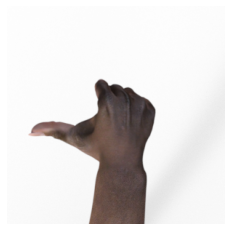

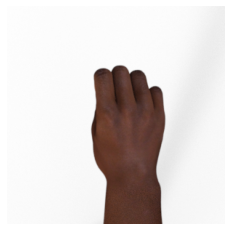

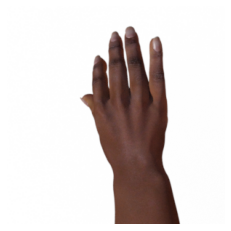

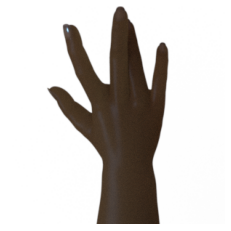

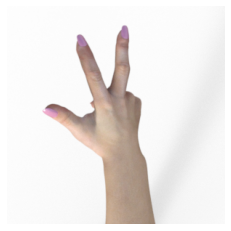

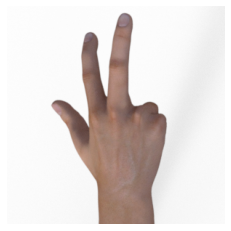

In [ ]:
index = 2

rock = [os.path.join(rock_dir, fname) 
                for fname in rock_files[index-2:index]]
paper = [os.path.join(paper_dir, fname) 
                for fname in paper_files[index-2:index]]
scissors = [os.path.join(scissors_dir, fname) 
                for fname in scissors_files[index-2:index]]

for i, img_path in enumerate(rock+paper+scissors):
  img = mpimg.imread(img_path)
  plt.imshow(img)
  plt.axis('Off')
  plt.show()

## Data Preprocessing and Augmentation

Computer Vision require enormous amount of the images. Because the dataset is small, image data augmentation technique is used to create more images by modifying the existing images. 

Using Keras `ImageDataGenerator`, the source images will not be transformed. 

In [ ]:
## Training directory

train_dir="/tmp/rps/"

## Each images will be loaded from the directory and undergo augmentation (as defined later)
## Source images are not modified

training_datagen=ImageDataGenerator(

                    rescale=1./255,
                    rotation_range=40,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'

)

valid_dir="/tmp/rps-test-set/"

validation_datagen=ImageDataGenerator(rescale=1./255)

train_generator=training_datagen.flow_from_directory(
    
            train_dir,
            target_size=(150, 150),
            class_mode='categorical',
            batch_size=126)

validation_generator=validation_datagen.flow_from_directory(
    
            valid_dir,
            target_size=(150, 150),
            class_mode='categorical',
            batch_size=126)

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Creating Convolutional Neural Network model

A typical CNN is made of 3 blocks:

* `Convolution` layers for extracting features in image using filters. 

* `Pooling` layers for compressing the feature maps produced by the Convolution layers. 

* `Fully Connected (FC)` layers to match the extracted features with the exact labels. Before FC, `Flatten` is used to convert the feature maps into single column vector because that's what the `Dense` layer expect at the input. 

Other notes about the model:

* `Dropout` is used to avoid overfitting when the neural network is big. 
* Since we have 3 classes (rock, paper, and scissor), there are `3` neurons at the last dense layer with the activation function of `softmax`. Softmax will give the exact categories of the predicted hands instead of probabilities. 

In [ ]:
model=tf.keras.models.Sequential([
                                  
          tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),



          tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
          tf.keras.layers.MaxPooling2D(2,2),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dropout(0.2),


          tf.keras.layers.Dense(512, activation='relu'),
          tf.keras.layers.Dense(3, activation='softmax')

])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

## Compiling and Training the Model

The model is compiled with the optimizer of `adam` and loss of `categorical_crossentropy`. 

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(train_generator, epochs=25, steps_per_epoch=20, validation_data = validation_generator, verbose = 1, validation_steps=3)


Epoch 1/25
20/20 [==============================] - 59s 1s/step - loss: 1.3479 - accuracy: 0.3433 - val_loss: 1.0877 - val_accuracy: 0.5054
Epoch 2/25
20/20 [==============================] - 20s 1s/step - loss: 1.0783 - accuracy: 0.4104 - val_loss: 0.7810 - val_accuracy: 0.7500
Epoch 3/25
20/20 [==============================] - 20s 1s/step - loss: 0.9011 - accuracy: 0.5763 - val_loss: 0.4813 - val_accuracy: 0.9140
Epoch 4/25
20/20 [==============================] - 20s 995ms/step - loss: 0.7290 - accuracy: 0.6925 - val_loss: 0.3161 - val_accuracy: 0.8763
Epoch 5/25
20/20 [==============================] - 20s 993ms/step - loss: 0.5876 - accuracy: 0.7557 - val_loss: 0.2022 - val_accuracy: 0.9597
Epoch 6/25
20/20 [==============================] - 20s 986ms/step - loss: 0.4179 - accuracy: 0.8440 - val_loss: 0.2429 - val_accuracy: 0.9435
Epoch 7/25
20/20 [==============================] - 20s 993ms/step - loss: 0.4388 - accuracy: 0.8281 - val_loss: 0.1480 - val_accuracy: 0.9516
Epoch 8/

## Visualizing the model results



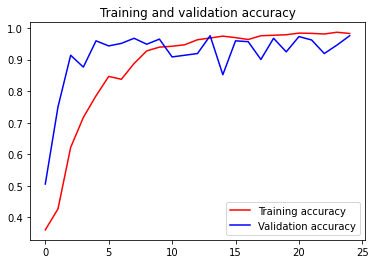

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

## Model Prediction from our custom images

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  print(classes)